**What is Markowitz Portfolio Optimization?**

According to the theory, it's possible to construct an "efficient frontier" of optimal portfolios offering the maximum possible expected return for a given level of risk. This theory was pioneered by Harry Markowitz in his paper "Portfolio Selection," published in 1952 by the Journal of Finance. He was later awarded a Nobel prize for developing the MPT. 

**Why it's interesting?**

Most of my life, I assumed "higher risk = higher reward" when it came to investing. That is typically the case when looking at investing through the paradigm of individual stocks only. If you take into consideration the correlation coefficient between stocks, it's actually possible to receive a higher return and an equal (or lower) risk through diversification. In this outline, I will do my best to guide the reader to see how this is such an exciting concept.

**Predictions:**

We will be analyzing GLD (SPDR Gold Shares - a gold ETF) and AMZN (Amazon- Seattle E-commerce giant) from November 2004 - May 2019. 
* Which asset has a higher return? Which has a higher risk?

* If we were to make a portfolio solely out of these 2 assets, what ratio of gold to amazon would be the most conservative if our goal was to minimize risk (100% GLD, 0% AMZN), (50% GLD,50% AMZN), etc?

* Which ratio would be the most return-maximizing, while simultaneously minimizing amount of risk per unit of return?
--------------------------------------------------------------------------------------------------------------------------------

Import modules:

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

Next, let's pull in the data. 
Side note: I made another version of this program off Kaggle, and in that version, I connect directly to the Yahoo Finance API, which is much more practical for viewing a large amount of stocks. The code for the api: 

> assets = ['GLD', 'AMZN',]
>
> pf_data = pd.DataFrame()
> 
> for a in assets:
>
>     pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2004-11-18')['Adj Close']

But the code we will be using is in csv format:

In [2]:
pf_data = pd.read_csv('../input/GLD_AMZN.csv', index_col = 'Date')

Now that we have the data pulled in and assigned it to a variable, let's go ahead and plot the normalized price trends. From this perspective, Amazon has by far been the superior asset for the last 15 years. Remember, high return implies high risk, right?

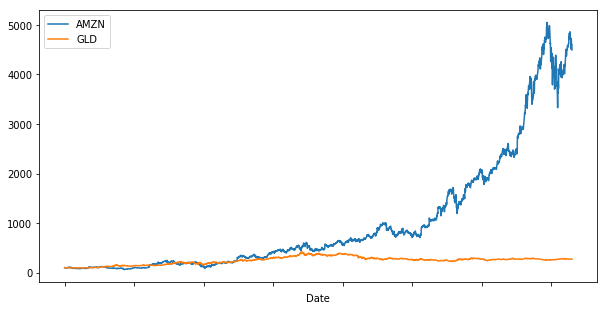

In [3]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

Let's dig into the real numbers. We're going to calculate the log returns, standard deviation, covariance, and correlation for these stocks.

**Means**

In [4]:
log_returns = np.log(pf_data / pf_data.shift(1))
log_returns.mean()*250

AMZN    0.260615
GLD     0.068776
dtype: float64

**Risks**

In [5]:
log_returns.std()*250**0.5

AMZN    0.386061
GLD     0.182756
dtype: float64

**Covariance**

In [6]:
log_returns.cov()

,AMZN,GLD
AMZN,0.000596,-0.000007
GLD,-0.000007,0.000134


**Correlation**

There is a very low correlation; however, any correlation still has an impact. 

In [7]:
log_returns.corr()

,AMZN,GLD
AMZN,1.000000,-0.024108
GLD,-0.024108,1.000000


We will use this piece of code later. But to briefly explain, I'm making an array with 2 random numbers that will add up to 1. 

In [8]:
weights = np.random.random(2)
weights = weights/np.sum(weights)
weights

array([0.46792848, 0.53207152])

Now it's time for us to run a simulation. We are doing this to see all the possible combinations of gold and amazon weights. With each random set of weights, our simulation will calculate a new annual return and standard deviation for the portfolio. 

We start by making 2 empty lists called 'pfolio_returns' and 'pfolio_volatilities'. These will capture all simulation calculations of the **for** function beneath it. 

We add in our random weights generator code from earlier and have 1000 interations of random weights plug into our portfolio return and portfolio volatility formulas. The append method is what creates a new entry to the list with each interation. 

In [9]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(2)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.08433641, 0.14051932, 0.13398214, 0.1999035 , 0.22997431,
        0.18359119, 0.11226297, 0.18499792, 0.13470566, 0.23569316,
        0.1314668 , 0.14839964, 0.10983728, 0.21858163, 0.12405821,
        0.22597355, 0.14672683, 0.08946818, 0.1913734 , 0.08570224,
        0.25608485, 0.14586459, 0.10742385, 0.23704636, 0.11060216,
        0.20095439, 0.13971551, 0.15376506, 0.18808351, 0.21641281,
        0.17648651, 0.19921818, 0.23825409, 0.19409554, 0.11429877,
        0.13804168, 0.16148732, 0.08557895, 0.17814682, 0.14448733,
        0.17894828, 0.15725304, 0.16307958, 0.176081  , 0.22201429,
        0.23940759, 0.16124141, 0.15919391, 0.19532145, 0.17596034,
        0.14736934, 0.21163907, 0.15425024, 0.12604827, 0.15790768,
        0.08219829, 0.09036254, 0.16580377, 0.12002918, 0.09480613,
        0.23379622, 0.15428973, 0.15772453, 0.11467903, 0.16085118,
        0.18603394, 0.24684841, 0.18279948, 0.2175761 , 0.20511464,
        0.17418313, 0.11768039, 0.24898633, 0.15

The arrays above contain valuable information, but we can't plot it. In order to plot, we need to turn the arrays into a dataframe object. We can use a dictionary for this by assigning the column keys to the columns.

In [10]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.084336,0.170083
1,0.140519,0.182039
2,0.133982,0.176095
3,0.199903,0.268783
4,0.229974,0.325009


Now let's plot the dataframe object we created!

As you can see, it has a boomerang shape. That's exactly how most of these portfolio optimization plots are supposed to look. At the bottom end of the plot is the risk/return for GLD (6.8% return/ 18.3%std), and at the top-right end is the risk/return for AMZN (26.1% return/ 38.6%std). 

In the middle, is what the risk/return dynamic looks like as you blend the 2 in a portfolio. Towards the top is more AMZN allocated, toward the bottom is more GLD. 

Text(0, 0.5, 'Expected Return')

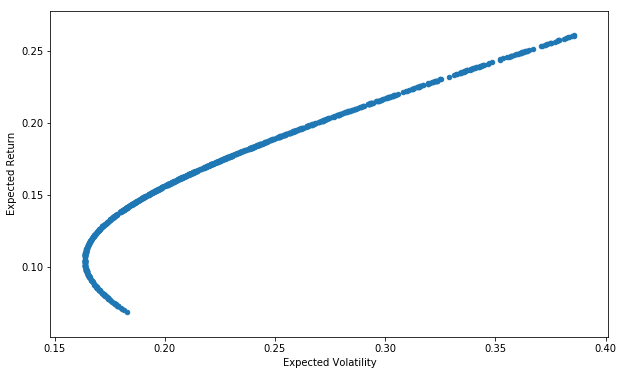

In [11]:
portfolios.plot(x='Volatility', y='Return',kind = 'scatter',figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

**Conservative Perspective:**

Where the curve has the least risk (around 16% std), it looks to be around 80% GLD and 20% AMZN. Surprisingly, that point has a higher return **and a lower risk** than we would have if we were invested 100% in GLD. That disproves the notion that higher return implies higher risk. We are moving from an individual stock paradigm to a portfolio paradigm. 

**Sharpe Perspective:**

Ideally, we want to maximize return while minimizing risk. That means most people want to be as close to the top left corner of that graph as possible.
That's where the **Sharpe ratio** comes in: the average return earned in excess of the risk-free rate per unit of volatility. In essence, Sharpe figured out a way to calculate the point on this curve which is closest to the top left. 

If we go all in on Amazon, we still have the highest return, but we also have a proportionately higher amount of risk per percent of return. If we are somewhere in the middle, we will theoretically optimize our portfolios by minimizing risk and maximizing returns. 

**So what is the optimal portfolio balance of GLD and AMZN?**

I found a program on Github that actually automates this process for us. The image below shows the exact portfolio specifications for AMZN and GLD from both a minimum volatility perspective and a maximum Sharpe ratio perspective. I tweaked the original code slightly and plugged our data into Ricky Kim's code to receive this image:

![](https://imgur.com/yz3KFO1.jpg)

But even based on strictly the original code I provided, you can get a sense which point on the curve minimizes risk (closest to the left), which maximizes Sharpe (closest to the top left), and what weight of each stock is used for each of those points (by guaging how far along the line the points are). 

Big thanks to Ricky Kim for the inspiration and great article:
https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f